<a href="https://colab.research.google.com/github/Pavani-Banothu/CodeClause/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Report:**


# > Gold Price Prediction



Importing Libraries

In [ ]:
dataset_link = "/content/drive/MyDrive/FINAL_USO.csv"

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv(dataset_link)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [ ]:
dataset.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [ ]:
# Replacing missing values
dataset = dataset.fillna(dataset.mean())

<ipython-input-50-cae2c4cf796d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset = dataset.fillna(dataset.mean())


In [ ]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


# Univariate Regression

In [ ]:
x_data = dataset['High']
y_data = dataset['Close']

In [ ]:
# Creating each single feature as a vector
x_data = np.array(x_data).reshape((-1,1))
print(x_data)

[[154.949997]
 [155.369995]
 [155.860001]
 ...
 [120.900002]
 [121.080002]
 [121.260002]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("shape of training samples:",x_train.shape)
print("shape of test samples :", x_test.shape)
print("shape of train labels :", y_train.shape)
print("shape of test labels:",y_test.shape)

shape of training samples: (1460, 1)
shape of test samples : (258, 1)
shape of train labels : (1460,)
shape of test labels: (258,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from numpy.ma.core import nonzero
lre=LinearRegression()

lre.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept is ",lre.intercept_,"\n","Coef is",lre.coef_)

Intercept is  0.23686843509443634 
 Coef is [0.99403915]


In [ ]:
r_squared = lre.score(x_test, y_test)
print("R Square value is ",r_squared)

R Square value is  0.9989365718042149


In [ ]:
y_pred = lre.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[115.58517239 125.33669347 120.09811113 170.55553242 121.45993979
 116.21141408 117.44402859 165.40641757 118.6070524  151.17176899
 113.43804385 126.10210859 115.76409944 128.72636399 118.57723222
 120.29691598 115.88337917 119.95894565 117.15575624 113.239239
 152.94115768 173.19968053 117.46390539 153.87555747 110.41616384
 124.03450517 124.75021435 157.43421862 127.51363424 107.15571742
 115.24719511 127.61304412 118.48776472 157.9709938  108.96486768
 121.28101275 120.35655534 119.31281921 124.04444755 123.20945069
 114.93904496 127.90130951 172.12611626 114.69053517 162.30500449
 114.51160812 105.92311086 161.25132597 116.04242941 136.2114768
 119.84960134 122.05636925 127.51363424 128.01065382 124.82973152
 119.26311427 127.54346933 119.96888107 127.67268448 117.1060513
 126.30091344 113.74620096 152.38449874 124.79991233 155.13799116
 115.89332155 120.80387793 126.33073262 126.07228045 119.81978116
 116.48974404 112.82174455 154.00478653 123.45796047 163.477

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("MSE is:", MSE)
print("RMSE is:", RMSE)
print("R_squared is:", r_squared)

MSE is: 0.31840748032184835
RMSE is: 0.5642760674721624
R_squared is: 0.9989365718042149


# Multivariate Regression

In [ ]:
x_data = dataset[[ 'Open', 'High', 'Low', 'Volume']]
y_data = dataset['Close']

In [ ]:
x_data.head()

,Open,High,Low,Volume
0,154.740005,154.949997,151.710007,21521900
1,154.309998,155.369995,153.899994,18124300
2,155.479996,155.860001,154.360001,12547200
3,156.820007,157.429993,156.580002,9136300
4,156.979996,157.529999,156.130005,11996100


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("shape of training samples:",x_train.shape)
print("shape of test samples :", x_test.shape)
print("shape of train labels :", y_train.shape)
print("shape of test labels:",y_test.shape)

shape of training samples: (1460, 4)
shape of test samples : (258, 4)
shape of train labels : (1460,)
shape of test labels: (258,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

lre.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept is ",lre.intercept_,"\n","Coefficients are",lre.coef_)

Intercept is  -0.14984535466015814 
 Coefficients are [-6.20977949e-01  8.70116894e-01  7.52140382e-01 -7.85236776e-09]


In [ ]:
r_squared = lre.score(x_test, y_test)
print("R Square value is ",r_squared)

R Square value is  0.999527744487787


In [ ]:
y_pred = lre.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[115.7989402  125.5648628  118.87506742 171.06611034 121.14611975
 116.48292265 117.77425248 165.87883461 118.84112138 149.69106001
 112.79307964 126.38168913 116.0053736  128.59256732 118.69029337
 120.5774915  115.96639395 120.21174801 117.36709583 113.45553193
 151.13682849 173.64263094 117.38030435 154.23901841 110.41676805
 124.16506632 124.05470935 157.34485816 127.59142483 107.40841408
 115.25055703 127.9260504  118.12753174 158.48880259 108.78403915
 121.46224616 119.54701715 119.72255117 123.92484561 123.42050954
 114.94380524 128.03678623 172.41022745 114.76381174 162.46831692
 114.53692369 105.73547711 161.30415854 114.73607323 136.25366648
 120.06877688 122.39962539 127.59324709 128.04396566 124.66747192
 119.19111356 127.64521729 120.31387792 127.46512499 116.882676
 125.3067166  113.65835164 152.90883956 124.84735335 155.28672003
 116.00052982 120.75218762 126.49824822 126.39540024 120.08027188
 116.4269184  112.04972666 154.47180905 123.02067058 162.5

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("MSE is:", MSE)
print("RMSE is:", RMSE)
print("R_squared is:", r_squared)

MSE is: 0.14140088471214166
RMSE is: 0.37603308991648815
R_squared is: 0.999527744487787


# Observe Variance Inflation Factor(VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

# Adding constant to predictor variables for intercept term
X = sm.add_constant(X)

# Computing VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["predictor"] = X.columns

print(vif)

    VIF Factor predictor
0    55.233356     const
1  1504.408695      Open
2  1542.102676      High
3  1531.945066       Low
4     1.843480    Volume


# Implement Ridge Regression Model

In [ ]:
x_data = dataset['High']
y_data = dataset['Close']
# Creating each single feature as a vector
x_data = np.array(x_data).reshape((-1,1))
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=0.0)

ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

print("RSquared Error : ", ridge_model.score(x_test,y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

RSquared Error :  0.9989365718042149
Mean Squared Error:  0.3184074803218478


# LASSO Regression Model

In [ ]:
from sklearn import datasets
from sklearn.linear_model import Lasso

# Creating an instance of Lasso Regression implementation
lasso = Lasso(alpha=0.2)

# Fitting the Lasso model
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# Creating the model score

print("Model Score : ",lasso.score(x_test, y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Model Score :  0.9989351669832551
Mean Squared Error:  0.3188281062784484


# Observation on above models

For Univariate model

In [ ]:
X = dataset['High']
y = dataset['Close']

In [ ]:
# calculating the slope and intercept of the best-fit line
slope = np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X)) ** 2)
intercept = np.mean(y) - slope * np.mean(X)

In [ ]:
print(slope, intercept)

0.9941541181687817 0.2126653254048989


In [ ]:
lre=LinearRegression()
lre.fit(np.array(X).reshape((-1,1)),y)
pred_slope = lre.coef_
pred_intercept = lre.intercept_

In [ ]:
print(pred_slope, pred_intercept)

[0.99415412] 0.21266532540485628


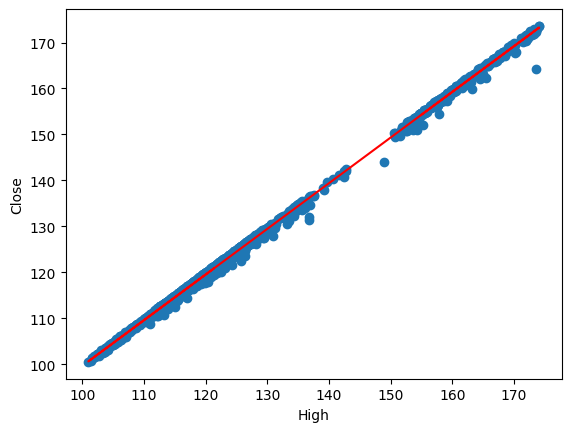

In [ ]:
# ploting the scatter plot and the best-fit line
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slope * X + intercept, color='red')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

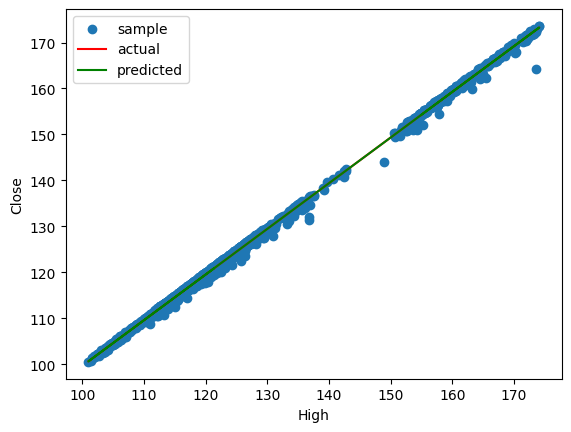

In [ ]:
# ploting the scatter plot and the best-fit line
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slope * X + intercept, color='red')
plt.plot(X, pred_slope * X + pred_intercept, color='green')
plt.legend(['sample','actual','predicted'])
plt.xlabel('High')
plt.ylabel('Close')
plt.show()


For Multivariate model

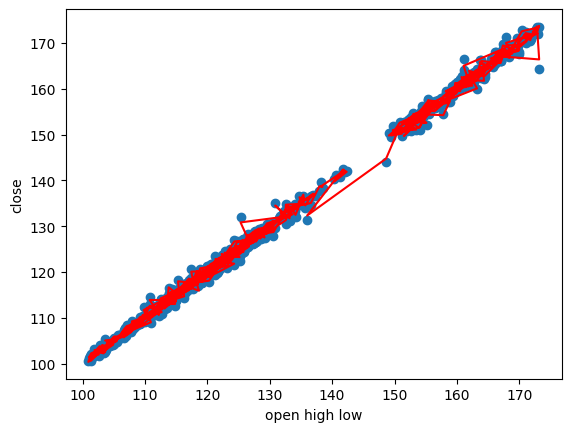

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# input features ['Open', 'High', 'Low', 'Volume']
open = dataset['Open']
high = dataset['High']
low = dataset['Low']

# target variable
close = dataset['Close']

# combining input features into a single matrix
X = np.column_stack((open, high, low))

# adding a column of ones for the intercept term
X = np.hstack((np.ones((len(X), 1)), X))

# calculating the least squares solution for the model coefficients
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(close)

# calculating predicted values of the target variable
y_pred = X.dot(w)

# ploting the scatter plot and best-fit line
fig, ax = plt.subplots()
ax.scatter(open, close)
ax.plot(open, y_pred, color='red')
ax.set_xlabel('open high low')
ax.set_ylabel('close')
plt.show()

# **THANK YOU**